In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/fashion_dataset - Add more 32 rows for above data for same outfit.csv')

# Convert dates to datetime format
#df['dates'] = pd.to_datetime(df['dates'])

# Display the first few rows of the dataframe
df.head()


,Trend,Comment,Sentiment,Date (YYYY-MM-DD)
0,Monochrome Outfits,"""Love this sleek black and white combo!""",Positive,2024-07-07
1,Monochrome Outfits,"""Feels a bit too boring, needs a pop of color.""",Negative,2024-07-07
2,Monochrome Outfits,"""Monochrome is always a classic choice.""",Neutral,2024-07-07
3,Monochrome Outfits,"""This is such a statement piece."",",Positive,2024-07-11
4,Monochrome Outfits,"""This outfit is so versatile!"",",Negative,2024-07-11


In [ ]:
df.isnull().sum()

Trend                 9
Comment               9
Sentiment             9
Date (YYYY-MM-DD)    10
dtype: int64

In [ ]:
df.shape

(291, 4)

In [ ]:
df['Trend'].value_counts()

Trend
Statement Sleeves     51
Monochrome Outfits    47
Overalls              47
Bold Floral Prints    46
Minimalist Chic       46
Athleisure            45
Name: count, dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Trend                0
Comment              0
Sentiment            0
Date (YYYY-MM-DD)    0
dtype: int64

In [ ]:
df.shape

(281, 4)

In [ ]:
df['Date (YYYY-MM-DD)'] = df['Date (YYYY-MM-DD)'].str.strip()

In [ ]:
df['dates'] = pd.to_datetime(df['Date (YYYY-MM-DD)'])
df.head()

,Trend,Comment,Sentiment,Date (YYYY-MM-DD),dates
0,Monochrome Outfits,"""Love this sleek black and white combo!""",Positive,2024-07-07,2024-07-07
1,Monochrome Outfits,"""Feels a bit too boring, needs a pop of color.""",Negative,2024-07-07,2024-07-07
2,Monochrome Outfits,"""Monochrome is always a classic choice.""",Neutral,2024-07-07,2024-07-07
3,Monochrome Outfits,"""This is such a statement piece."",",Positive,2024-07-11,2024-07-11
4,Monochrome Outfits,"""This outfit is so versatile!"",",Negative,2024-07-11,2024-07-11


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Assume you have a labeled dataset for training the sentiment analysis model
# labeled_data.csv should contain columns: 'comment' and 'sentiment' (0 for negative, 1 for positive)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Sentiment'], test_size=0.2, random_state=42)

# Create a pipeline that combines CountVectorizer and Naive Bayes classifier
nb_pipeline = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
nb_pipeline.fit(X_train, y_train)

# Predict on test set and print accuracy
y_pred = nb_pipeline.predict(X_test)
print(f'Naive Bayes Sentiment Analysis Accuracy: {accuracy_score(y_test, y_pred)}')


Naive Bayes Sentiment Analysis Accuracy: 0.7894736842105263


In [ ]:
from transformers import pipeline

# Load a pre-trained BERT model for sentiment analysis
bert_sentiment = pipeline('sentiment-analysis')

# Example prediction
print(bert_sentiment("I love this product!"))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998855590820312}]


In [ ]:
df['nb_sentiment'] = nb_pipeline.predict(df['Comment'])
df.head()

,Trend,Comment,Sentiment,Date (YYYY-MM-DD),dates,nb_sentiment
0,Monochrome Outfits,"""Love this sleek black and white combo!""",Positive,2024-07-07,2024-07-07,Positive
1,Monochrome Outfits,"""Feels a bit too boring, needs a pop of color.""",Negative,2024-07-07,2024-07-07,Negative
2,Monochrome Outfits,"""Monochrome is always a classic choice.""",Neutral,2024-07-07,2024-07-07,Neutral
3,Monochrome Outfits,"""This is such a statement piece."",",Positive,2024-07-11,2024-07-11,Neutral
4,Monochrome Outfits,"""This outfit is so versatile!"",",Negative,2024-07-11,2024-07-11,Positive


In [ ]:
# Apply Naive Bayes sentiment analysis
df['nb_sentiment'] = nb_pipeline.predict(df['Comment'])
df['nb_sentiment'] = df['nb_sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral':0.5})

# Apply BERT sentiment analysis
df['bert_sentiment'] = df['Comment'].apply(lambda x: bert_sentiment(x)[0]['label'])
df['bert_sentiment'] = df['bert_sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

# Average sentiment score
df['avg_sentiment'] = df[['nb_sentiment', 'bert_sentiment']].mean(axis=1)

# Display the updated dataframe
df.head(20)


,Trend,Comment,Sentiment,Date (YYYY-MM-DD),dates,nb_sentiment,bert_sentiment,avg_sentiment
0,Monochrome Outfits,"""Love this sleek black and white combo!""",Positive,2024-07-07,2024-07-07,1.0,1,1.00
1,Monochrome Outfits,"""Feels a bit too boring, needs a pop of color.""",Negative,2024-07-07,2024-07-07,0.0,0,0.00
2,Monochrome Outfits,"""Monochrome is always a classic choice.""",Neutral,2024-07-07,2024-07-07,0.5,1,0.75
3,Monochrome Outfits,"""This is such a statement piece."",",Positive,2024-07-11,2024-07-11,0.5,1,0.75
4,Monochrome Outfits,"""This outfit is so versatile!"",",Negative,2024-07-11,2024-07-11,1.0,1,1.00
5,Monochrome Outfits,"""This is a trendy outfit that is perfect for r...",Negative,2024-07-08,2024-07-08,0.5,1,0.75
6,Monochrome Outfits,"""Obsessed with this outfit!"",",Neutral,2024-07-12,2024-07-12,0.5,0,0.25
7,Monochrome Outfits,"""This is so flattering!"",",Negative,2024-07-11,2024-07-11,1.0,1,1.00
8,Monochrome Outfits,"""This is such a statement piece."",",Neutral,2024-07-12,2024-07-12,0.5,1,0.75
9,Monochrome Outfits,"""Love the way [clothing item] is styled."",",Positive,2024-07-11,2024-07-11,1.0,1,1.00


In [ ]:
df['Trend'].value_counts()

Trend
Statement Sleeves     51
Monochrome Outfits    47
Overalls              47
Minimalist Chic       46
Bold Floral Prints    45
Athleisure            45
Name: count, dtype: int64

Text(0, 0.5, 'Average Sentiment')

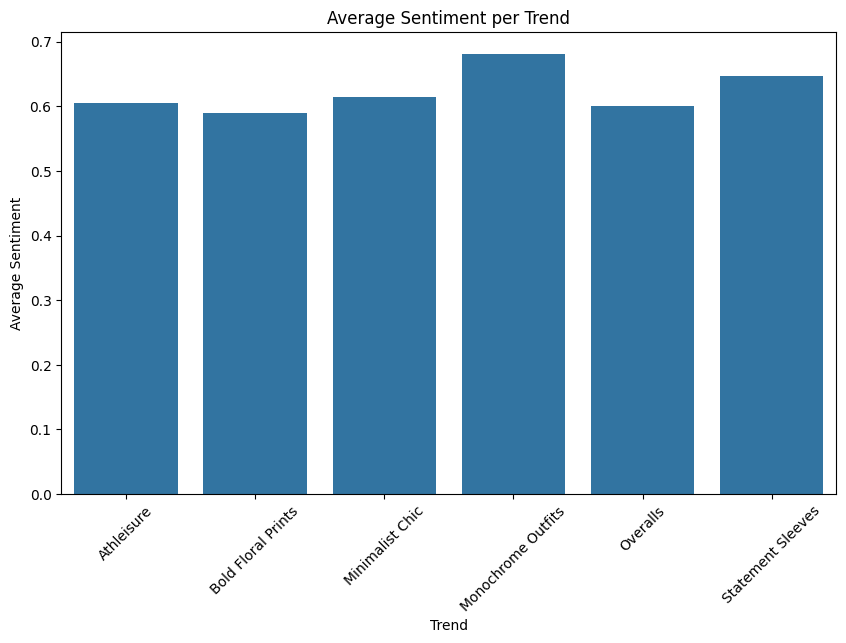

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Trend' and calculate average sentiment
avg_sentiments = df.groupby('Trend')['avg_sentiment'].mean().reset_index()

# Plotting with seaborn (optional, for more customized plots)
plt.figure(figsize=(10, 6))
sns.barplot(x='Trend', y='avg_sentiment', data=avg_sentiments)
plt.xticks(rotation=45)
plt.title('Average Sentiment per Trend')
plt.xlabel('Trend')
plt.ylabel('Average Sentiment')


# **TEST DATA FROM MYNTRA SHORT KURTHI COMMENTS**

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Datasets/SHORTKURTHI - add more 32 rows for above.csv",skiprows=2)
test_data.head(20)
test_data.isnull().sum()
test_data = test_data.dropna()
test_data['Date'] = test_data['Date'].str.strip()
test_data.columns = ['Trend', 'Comments', 'Date']
test_data['dates'] = pd.to_datetime(test_data['Date'])
test_data.head()

,Trend,Comments,Date,dates
0,Short Kurthi,Last one is too good,2024-07-11,2024-07-11
1,Short Kurthi,Tauba tauba editing That stop,2024-07-12,2024-07-12
2,Short Kurthi,You are looking like Radhika Merchant.you are ...,2024-07-12,2024-07-12
3,Short Kurthi,3rd one is best by the way looking beautiful i...,2024-07-11,2024-07-11
4,Short Kurthi,Which app do you use for editing??,2024-07-12,2024-07-12


In [ ]:
test_data['nb_sentiment'] = nb_pipeline.predict(test_data['Comments'])
test_data['nb_sentiment'] = test_data['nb_sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral':0.5})

# Apply BERT sentiment analysis
test_data['bert_sentiment'] = test_data['Comments'].apply(lambda x: bert_sentiment(x)[0]['label'])
test_data['bert_sentiment'] = test_data['bert_sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

# Average sentiment score
test_data['avg_sentiment'] = test_data[['nb_sentiment', 'bert_sentiment']].mean(axis=1)

# Display the updated dataframe
test_data.head(20)

,Trend,Comments,Date,dates,nb_sentiment,bert_sentiment,avg_sentiment
0,Short Kurthi,Last one is too good,2024-07-11,2024-07-11,0.0,1,0.50
1,Short Kurthi,Tauba tauba editing That stop,2024-07-12,2024-07-12,0.5,0,0.25
2,Short Kurthi,You are looking like Radhika Merchant.you are ...,2024-07-12,2024-07-12,0.0,0,0.00
3,Short Kurthi,3rd one is best by the way looking beautiful i...,2024-07-11,2024-07-11,1.0,1,1.00
4,Short Kurthi,Which app do you use for editing??,2024-07-12,2024-07-12,0.0,0,0.00
5,Short Kurthi,Makeup tutorial pleasee it looks beautiful,2024-07-13,2024-07-13,0.0,1,0.50
6,Short Kurthi,you look so beautiful in this dress wow di,2024-07-12,2024-07-12,1.0,1,1.00
7,Short Kurthi,Hey\r\nI already hv the same last kurti\r\nLoo...,2024-07-11,2024-07-11,0.5,1,0.75
8,Short Kurthi,This songgg\r\nLots of blessings and love from...,2024-07-12,2024-07-12,1.0,1,1.00
9,Short Kurthi,Beautiful didi hope I will meet you once in m...,2024-07-11,2024-07-11,0.0,1,0.50


Text(0.5, 1.0, 'Reviews for Short kurthi from Myntra')

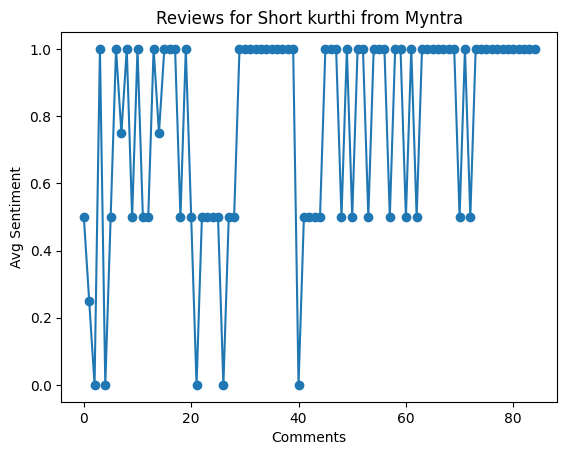

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_data['avg_sentiment'],marker='o')
plt.xlabel("Comments")
plt.ylabel("Avg Sentiment")
plt.title("Reviews for Short kurthi from Myntra")

In [ ]:
len(test_data)

85

In [ ]:
count=0
for i in range(len(test_data)):
  if test_data['avg_sentiment'][i]>0.5:
    count+=1

if count>0.5*(len(test_data)) and count<0.75*len(test_data):
  print("The product has a lot of scope for improvement")
elif count>0.75*len(test_data):
  print("The product gained a lot of positive response")
else:
  print("The product did not reach the customers well")

The product has a lot of scope for improvement


# **TREND BASED TIME SERIES ANALYSIS**

<ipython-input-15-2a3322516d62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['dates'] = pd.to_datetime(trend_data['dates'])


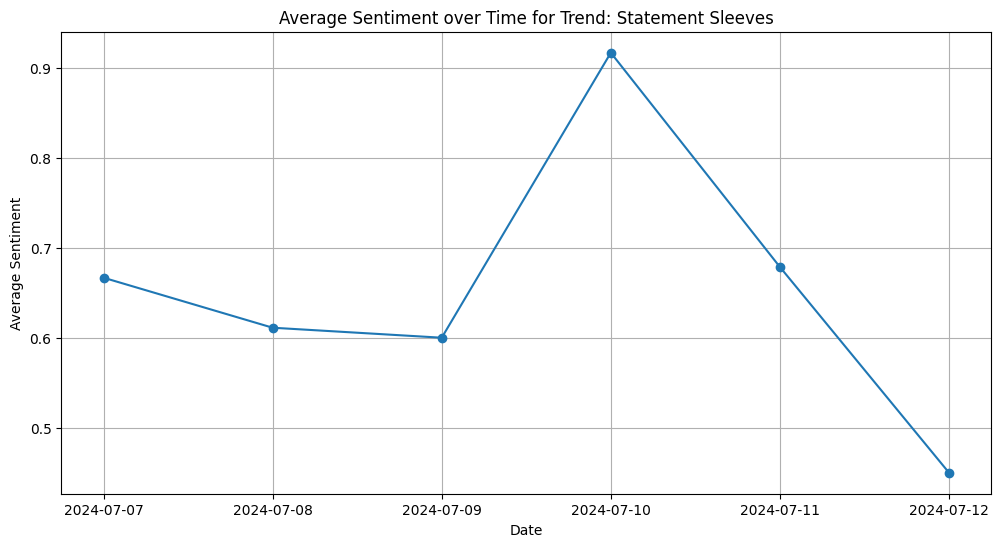

In [ ]:
# Assuming df is your dataset with columns 'Trend', 'dates', and 'avg_sentiment'
# Filter data for a particular trend
trend_name = 'Statement Sleeves'
trend_data = df[df['Trend'] == trend_name]

# Convert 'dates' to datetime if it's not already
trend_data['dates'] = pd.to_datetime(trend_data['dates'])

# Calculate average sentiment per date
average_sentiment = trend_data.groupby('dates')['avg_sentiment'].mean().reset_index()

# Sort by date if not already sorted (optional, depending on your data)
average_sentiment = average_sentiment.sort_values(by='dates')

# Visualize the trend data with average sentiment per date
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment['dates'], average_sentiment['avg_sentiment'], marker='o', linestyle='-')
plt.title(f'Average Sentiment over Time for Trend: {trend_name}')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()


# **FORECAST MODEL FOR PARTICULAR TREND USING ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
p, d, q = 1, 1, 1  # Example values
model = ARIMA(trend_data['avg_sentiment'], order=(p, d, q))

# Fit the ARIMA model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          avg_sentiment   No. Observations:                   51
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -24.195
Date:                Sat, 13 Jul 2024   AIC                             54.389
Time:                        10:26:22   BIC                             60.125
Sample:                             0   HQIC                            56.573
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2932      0.179     -1.642      0.101      -0.643       0.057
ma.L1         -0.9994      8.703     -0.115      0.909     -18.056      16.058
sigma2         0.1408      1.233      0.114      0.9

In [ ]:
# Forecast the next 'n' periods
n_periods = 30
forecast = model_fit.forecast(steps=n_periods)

# Print the forecast
print(f"Forecasted values for the next {n_periods} periods:")
print(forecast)


Forecasted values for the next 30 periods:
51    0.539483
52    0.674509
53    0.634919
54    0.646527
55    0.643123
56    0.644121
57    0.643829
58    0.643914
59    0.643889
60    0.643897
61    0.643895
62    0.643895
63    0.643895
64    0.643895
65    0.643895
66    0.643895
67    0.643895
68    0.643895
69    0.643895
70    0.643895
71    0.643895
72    0.643895
73    0.643895
74    0.643895
75    0.643895
76    0.643895
77    0.643895
78    0.643895
79    0.643895
80    0.643895
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, 'Prediction')

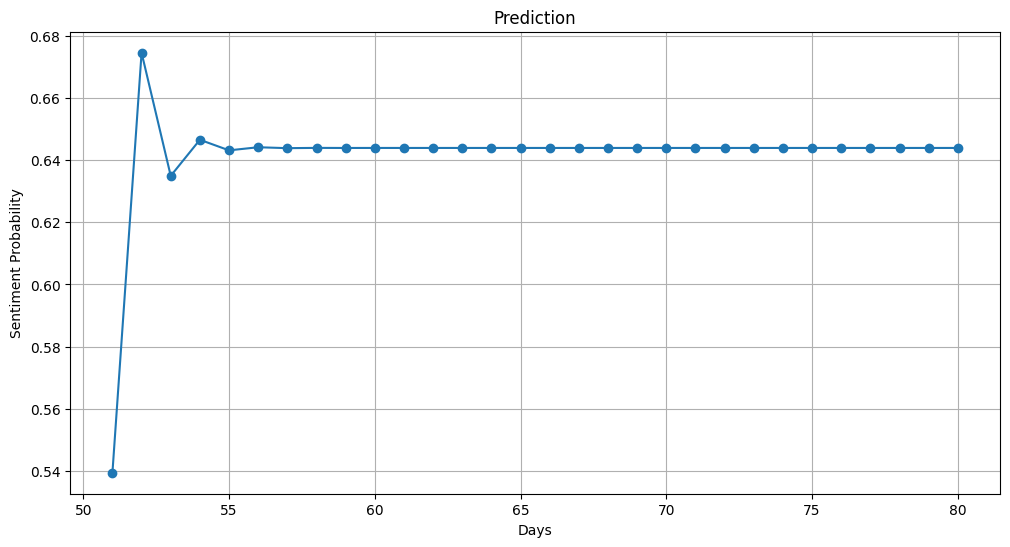

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(forecast, marker='o', linestyle='-')
plt.grid(True)
plt.xlabel("Days")
plt.ylabel("Sentiment Probability")
plt.title("Prediction")



```
# This is formatted as code
```

# **STREAMLIT INTERFACE**

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [ ]:

!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501

35.223.125.6



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.125.6:8501

npx: installed 22 in 6.911s
your url is: https://sixty-eyes-send.loca.lt
2024-07-13 12:59:17.276 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 589, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 28, in <module>
    trend_data = trend_data.groupby(trend_data['dates'].dt.date)['avg_sentiment'].mean().reset_index()
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/generic.py", line 1771, in __getitem__
    return super().__getitem__(key)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/base.py", line 244, in __getitem__
    raise KeyError(f"Column not found: {key}")
KeyError: 'Column not found: avg_sentiment'
2024-07-13 13:03:40.890

In [ ]:
# app.py code

import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import streamlit as st
import statsmodels.api as sm
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

def main():
    st.title('Fashion Trend Sentiment Analysis')

    df = pd.read_csv('/content/drive/MyDrive/Datasets/fashion_dataset - Add more 32 rows for above data for same outfit.csv')
    df = df.dropna()
    df['Date (YYYY-MM-DD)'] = df['Date (YYYY-MM-DD)'].str.strip()
    df['dates'] = pd.to_datetime(df['Date (YYYY-MM-DD)'])

    # Filter data for the given trend name

    X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Sentiment'], test_size=0.2, random_state=42)

    # Create a pipeline that combines CountVectorizer and Naive Bayes classifier
    nb_pipeline = make_pipeline(CountVectorizer(), MultinomialNB())

    # Train the model
    nb_pipeline.fit(X_train, y_train)

    df['nb_sentiment'] = nb_pipeline.predict(df['Comment'])
    df['nb_sentiment'] = df['nb_sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0.5})

    # Apply BERT sentiment analysis (replace with your BERT sentiment function)
    # df['bert_sentiment'] = df['Comment'].apply(lambda x: bert_sentiment(x)[0]['label'])
    # df['bert_sentiment'] = df['bert_sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})
    from transformers import pipeline

    # Load a pre-trained BERT model for sentiment analysis
    bert_sentiment = pipeline('sentiment-analysis')
    # Average sentiment score
    df['bert_sentiment'] = df['Comment'].apply(lambda x: bert_sentiment(x)[0]['label'])
    df['bert_sentiment'] = df['bert_sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

    df['avg_sentiment'] = df[['nb_sentiment', 'bert_sentiment']].mean(axis=1)
    # Group by 'Trend' and calculate average sentiment
    avg_sentiments = df.groupby('Trend')['avg_sentiment'].mean().reset_index()

    # Display average sentiment per trend as a bar chart
    st.title('Average Sentiment per Trend')
    st.bar_chart(avg_sentiments.set_index('Trend'))

    # Optionally, you can also display this data in a table
    st.write(avg_sentiments)

    trend_name = st.text_input('Enter Trend Name:')
    period = st.number_input('Enter Period to Forecast:', min_value=1, max_value=365, value=30)

    if st.button('Forecast'):
        st.write(f'Forecasting for Trend: {trend_name} for {period} days')

        trend_data = df[df['Trend'] == trend_name]

        # Convert 'dates' to datetime if it's not already
        #trend_data['dates'] = pd.to_datetime(trend_data['dates'])

        # Calculate average sentiment per date
        average_sentiment = trend_data.groupby('dates')['avg_sentiment'].mean().reset_index()

        # Sort by date if not already sorted (optional, depending on your data)
        average_sentiment = average_sentiment.sort_values(by='dates')


        # Fit the ARIMA model
        p, d, q = 1, 1, 1  # These values should be determined by ACF and PACF plots
        model = sm.tsa.ARIMA(trend_data['avg_sentiment'], order=(p, d, q))
        model_fit = model.fit()

        # Forecast the next 'period' periods
        forecast_values = model_fit.forecast(steps=period)

        # Plotting in Streamlit
        st.subheader('Time Series Data')
        st.line_chart(average_sentiment['avg_sentiment'])


        st.subheader('Forecasted Values')
        #forecast_df = pd.DataFrame({
        #    'Date': trend_data['dates'],
        #    'Forecasted Sentiment': forecast_values
        #})
        st.line_chart(forecast_values)


if __name__ == '__main__':
    main()
